In [135]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [136]:
# Variables
RANDOM_STATE = 42
TEST_SIZE = 0.25
LABEL = 'Label'

feature_names = [
    'area',
    'perimeter',
    'aspect_ratio',
    'extent',
    'convex_hull_area',           # Area of the convex hull
    'hull_perimeter',              # Perimeter of the convex hull
    'solidity',                    # Ratio of area to convex hull area
    'circularity',                 # Measure of how circular the shape is
    'eccentricity',                # Measure of the elongation of the shape
    'num_convexity_defects',       # Number of convexity defects
    'max_defect_depth',            # Maximum depth of convexity defects
    'major_axis_length',           # Length of the major axis of the fitted ellipse
    'minor_axis_length',           # Length of the minor axis of the fitted ellipse
    'orientation',                  # Orientation angle of the fitted ellipse
    'hu_moment',
    'centroid_x',
    'centroid_y'
]

In [137]:
# Dataset
df = pd.read_csv('data/exported_features.csv')

df

area    perimeter  aspect_ratio    extent  convex_hull_area  \
0    3577.5  2448.265275      1.207447  0.020957          115917.5   
1    3477.0  2441.027686      1.468354  0.023714          117373.5   
2    3629.5  2503.446950      1.412651  0.023310          127532.5   
3    4158.5  2683.877531      0.973469  0.017792          130918.5   
4    4119.5  2639.044929      0.686071  0.025953          130433.5   
..      ...          ...           ...       ...               ...   
128  5797.0  3701.501106      0.898451  0.019114          129650.5   
129  6582.5  4063.753858      0.791935  0.021623          153794.5   
130  5617.0  3569.336341      0.489691  0.033864          122837.5   
131  4864.0  3480.650050      1.797342  0.029870          112417.0   
132  4798.0  3449.620611      1.776667  0.030006          108911.5   

     hull_perimeter  solidity  circularity  eccentricity  \
0       1333.655802  0.030862     0.007500      0.793076   
1       1319.325353  0.029623     0.007333      0.779459   
2       1367.974810  0.028459     0.007277      0.783744   
3       1432.192723  0.031764     0.007255      0.876714   
4       1384.105492  0.031583     0.007433      0.786927   
..              ...       ...          ...           ...   
128     1583.352490  0.044713     0.005317      0.940789   
129     1733.716940  0.042801     0.005009      0.954500   
130     1504.358039  0.045727     0.005540      0.942873   
131     1437.404869  0.043267     0.005045      0.935883   
132     1421.912039  0.044054     0.005067      0.934622   

     num_convexity_defects  max_defect_depth  major_axis_length  \
0                     29.0        450.000000         482.628448   
1                     26.0        460.000000         475.232941   
2                     29.0        465.000000         496.927307   
3                     29.0        505.007812         583.424377   
4                     32.0        477.000000         494.924316   
..                     ...               ...                ...   
128                   21.0        600.839844         679.984985   
129                   25.0        618.734375         819.460632   
130                   23.0        578.000000         676.558594   
131                   22.0        537.000000         627.471985   
132                   20.0        529.000000         612.230957   

     minor_axis_length  orientation  hu_moment  centroid_x  centroid_y Label  
0           293.980042   113.097420  -0.970790       361.0       518.0     r  
1           297.711426    95.921295  -0.981204       346.0       468.0     r  
2           308.633484    81.764320  -0.995852       334.0       428.0     r  
3           280.634277   141.141266  -0.956791       338.0       534.0     r  
4           305.391418     1.555197  -0.941211       311.0       540.0     r  
..                 ...          ...        ...         ...         ...   ...  
128         230.510330    41.397125  -0.817731       293.0       471.0     s  
129         244.371765    26.165174  -0.843564       285.0       463.0     s  
130         225.396713   170.560455  -0.783685       289.0       481.0     s  
131         221.064896    78.086945  -0.783725       316.0       427.0     s  
132         217.735138    77.451073  -0.775177       312.0       433.0     s  

[133 rows x 18 columns]

In [138]:
# Find all records with missing values
nan_records = df[df.isna().any(axis=1)]

nan_records

Empty DataFrame
Columns: [area, perimeter, aspect_ratio, extent, convex_hull_area, hull_perimeter, solidity, circularity, eccentricity, num_convexity_defects, max_defect_depth, major_axis_length, minor_axis_length, orientation, hu_moment, centroid_x, centroid_y, Label]
Index: []

In [139]:
# Split dataset
train_X, test_X, train_y, test_y = train_test_split(df.drop(LABEL, axis=1), df[LABEL], test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [140]:
# Functions

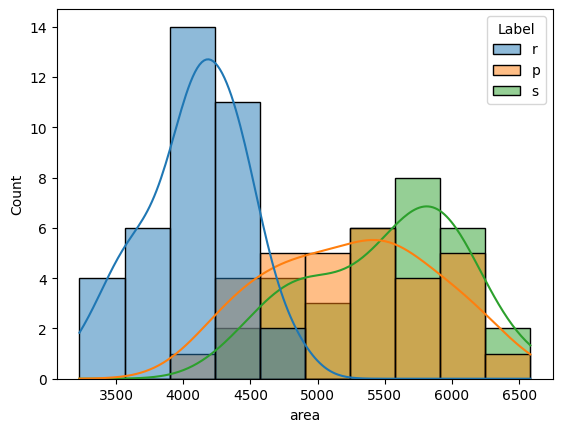

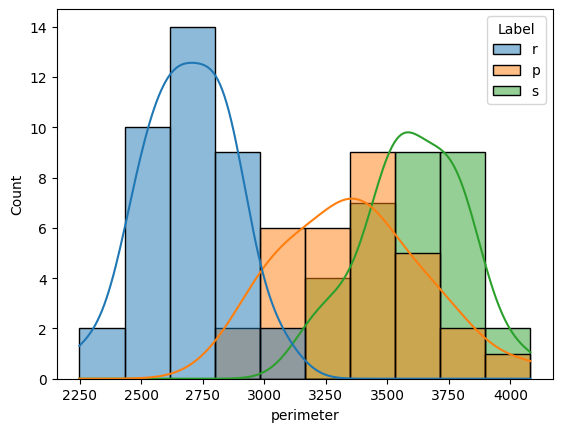

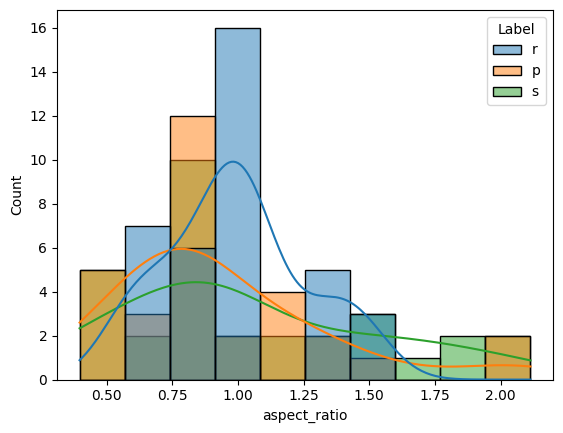

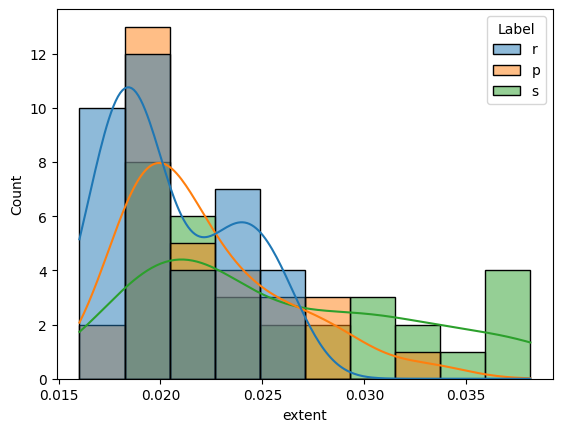

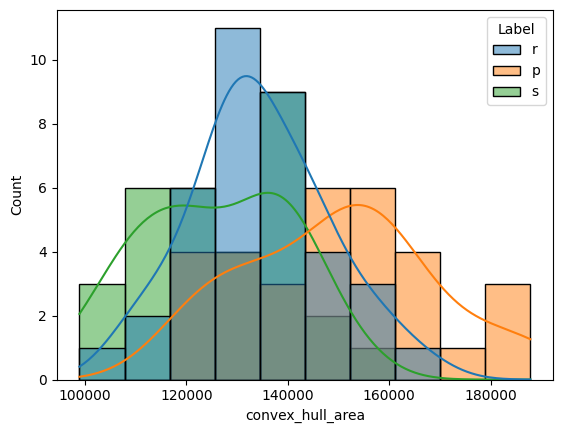

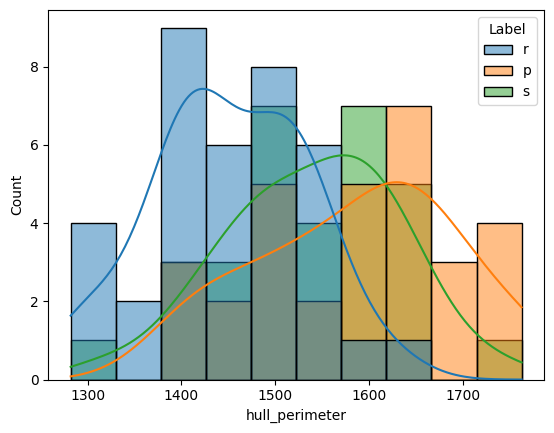

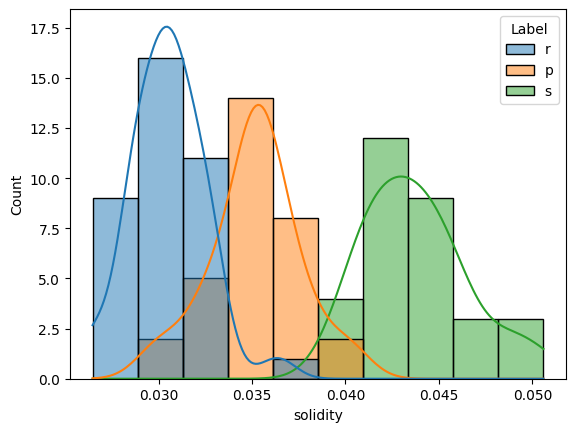

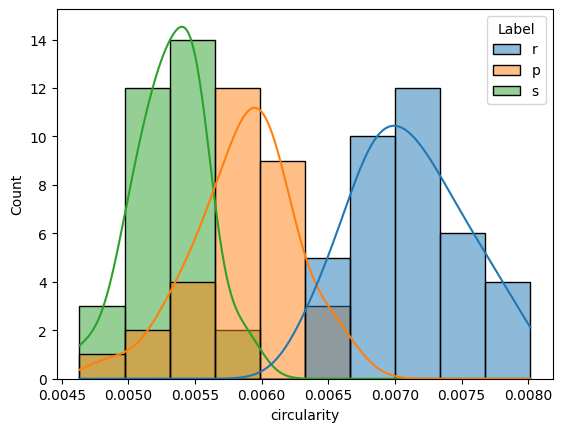

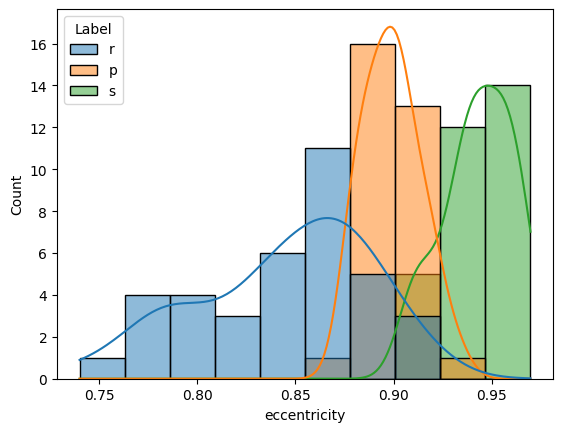

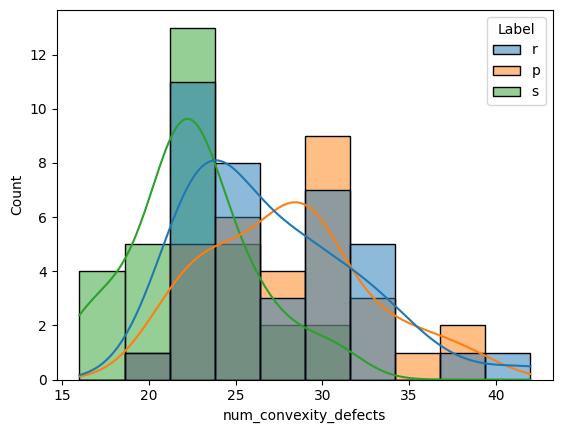

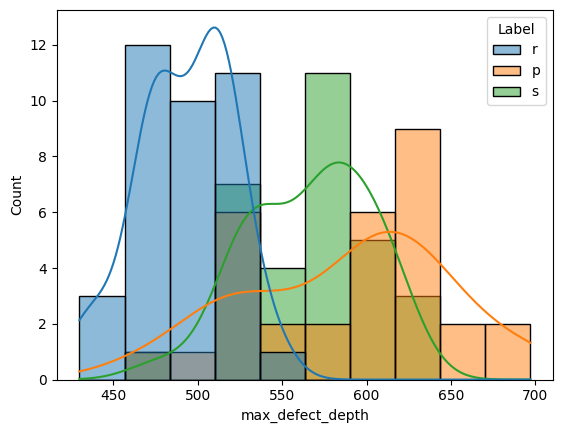

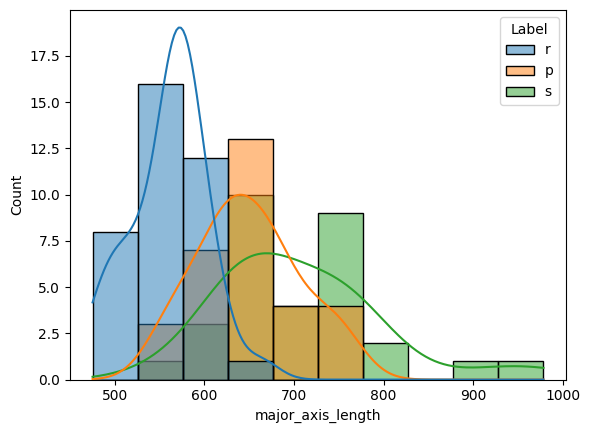

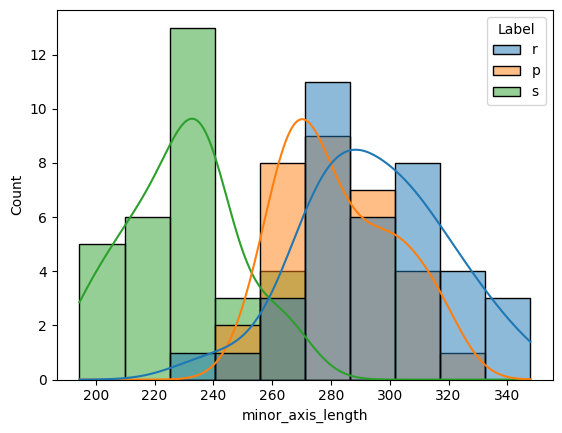

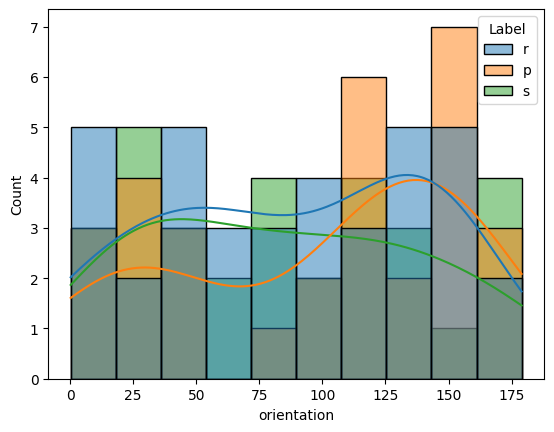

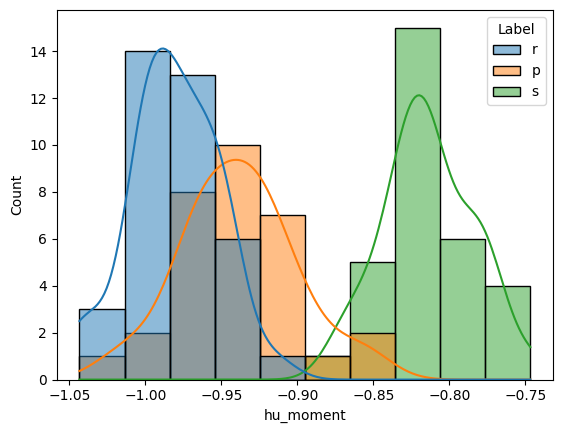

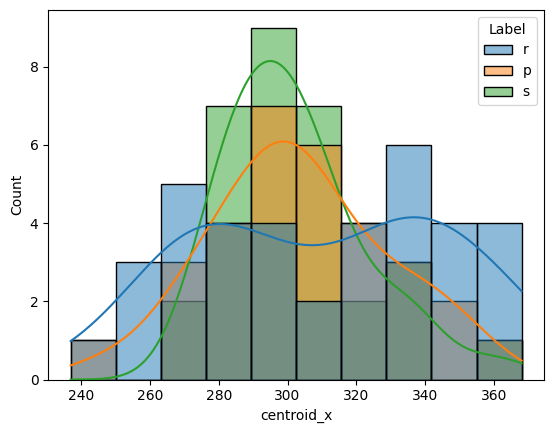

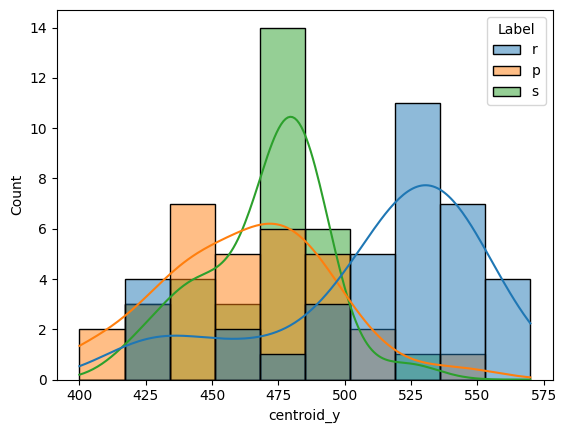

In [141]:
# Histograms
for feature in feature_names:
    sns.histplot(df, x=feature, hue=train_y, kde=True, bins=10)
    plt.show()

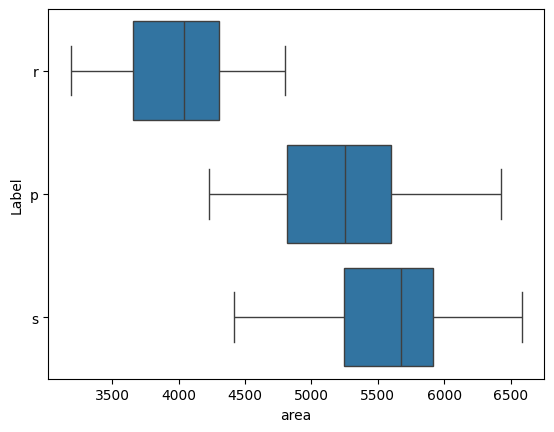

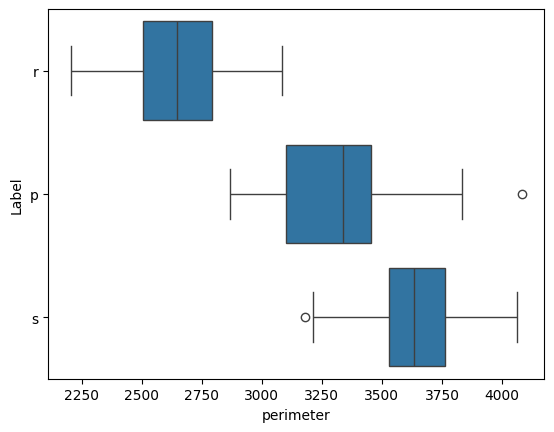

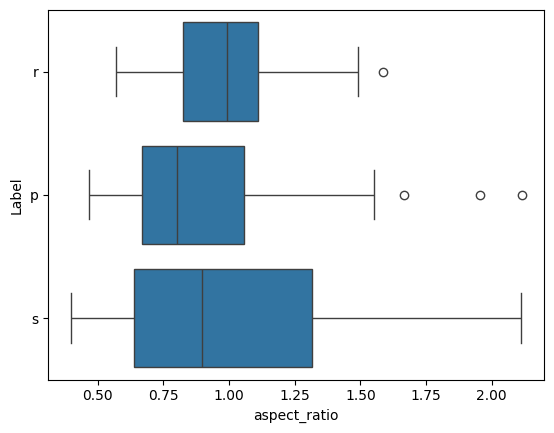

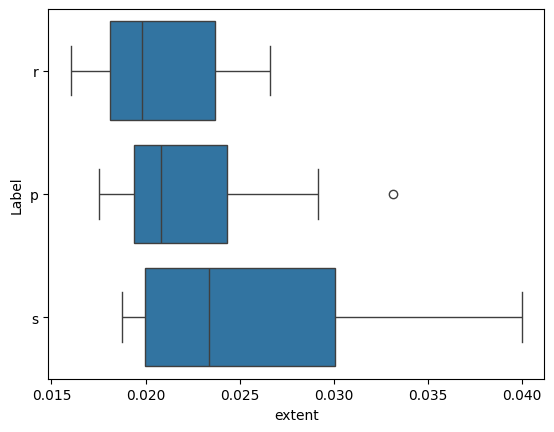

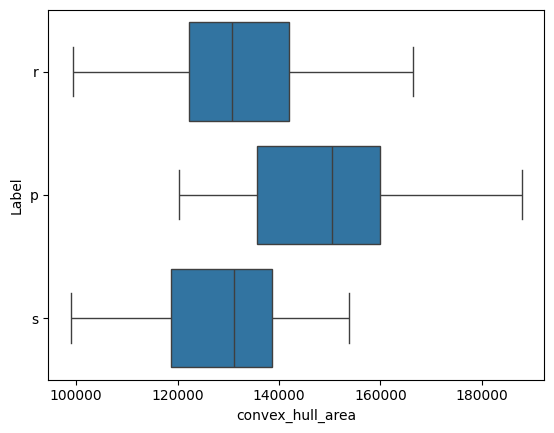

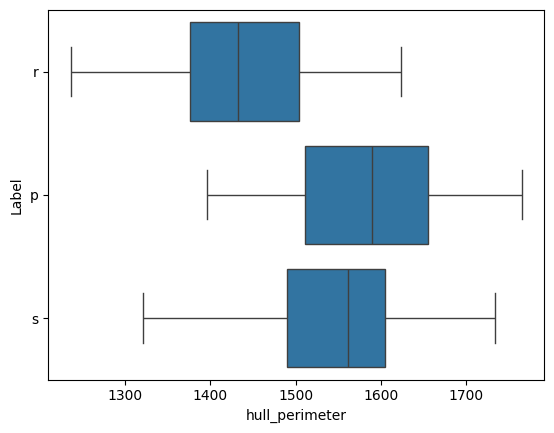

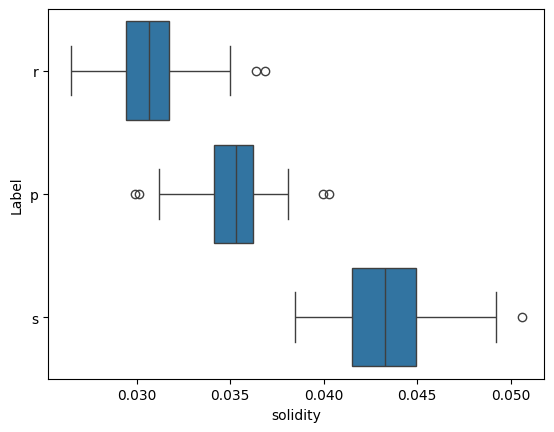

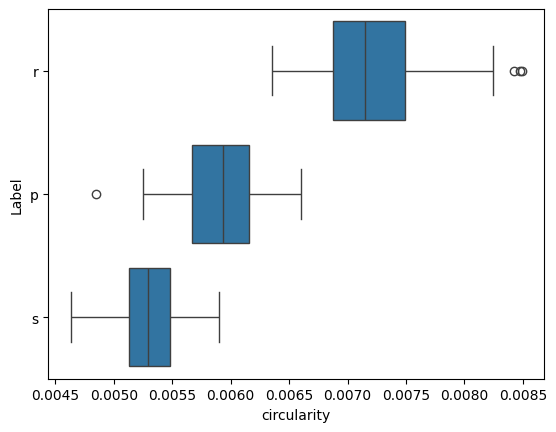

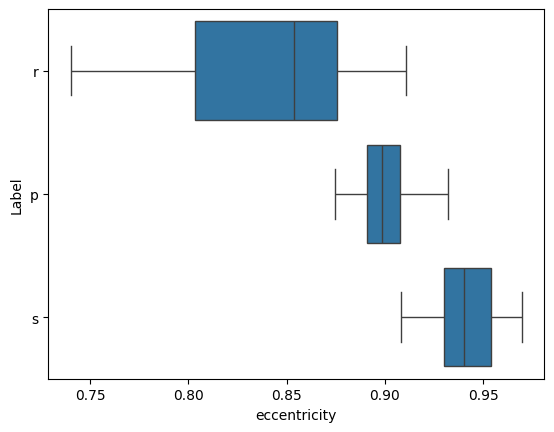

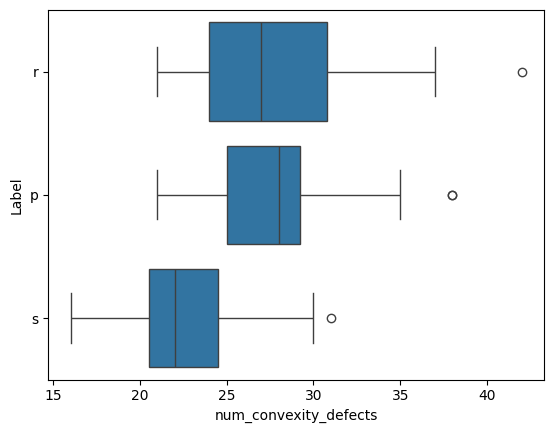

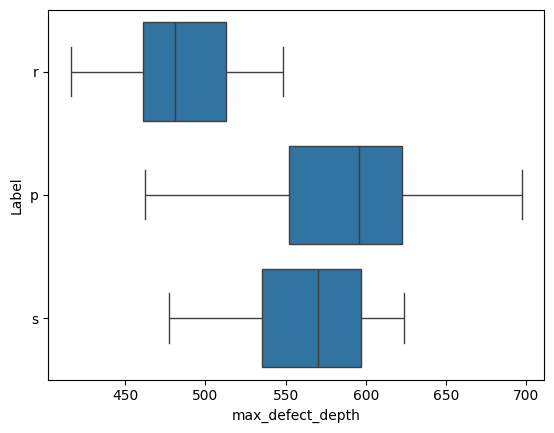

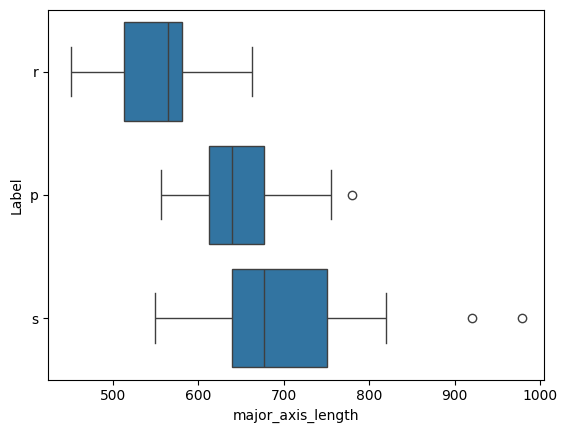

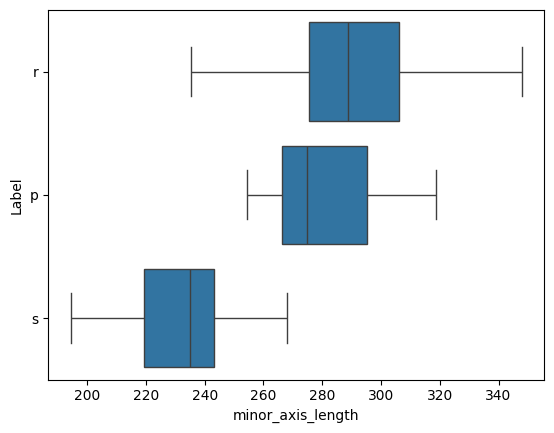

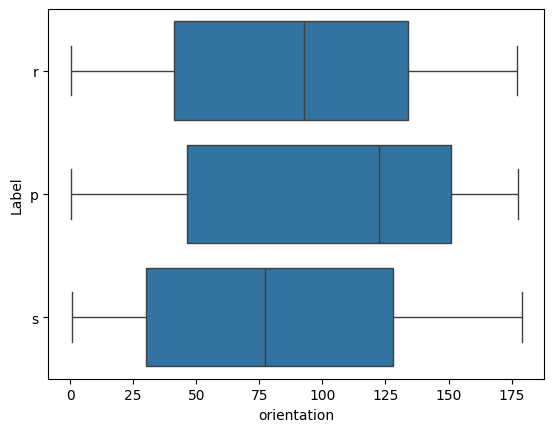

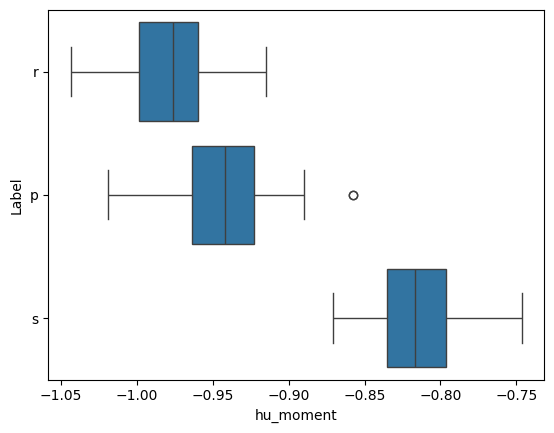

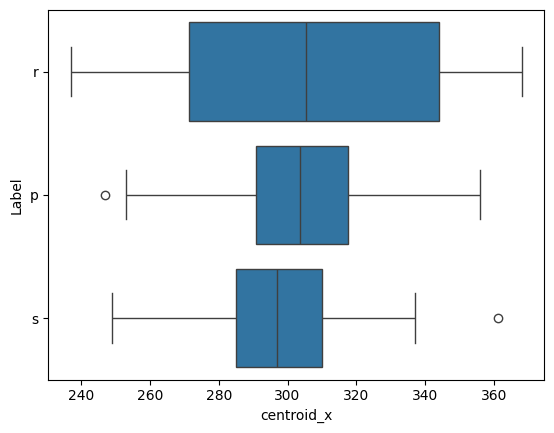

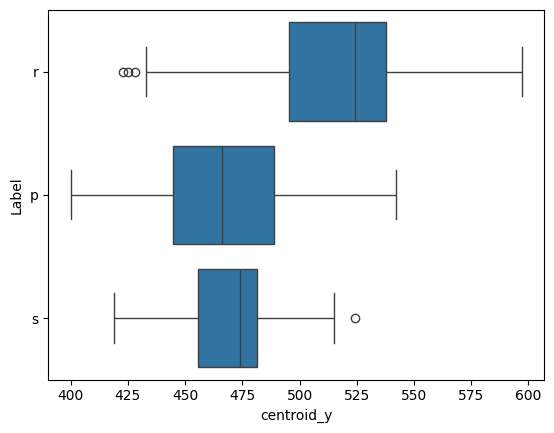

In [142]:
# Boxplots
# Create boxplots for each feature but with the 3 labels separate
for feature in feature_names:
    sns.boxplot(y=LABEL, x=feature, data=df)
    plt.show()

In [143]:
# Correlation matrix
# Calculate the correlation coefficient
df_corr = df.drop(LABEL, axis=1).corr()

df_corr


area  perimeter  aspect_ratio    extent  \
area                   1.000000   0.968141     -0.443845  0.232963   
perimeter              0.968141   1.000000     -0.261393  0.306347   
aspect_ratio          -0.443845  -0.261393      1.000000 -0.054660   
extent                 0.232963   0.306347     -0.054660  1.000000   
convex_hull_area       0.526045   0.425183     -0.512597 -0.225958   
hull_perimeter         0.848746   0.794623     -0.493474 -0.085874   
solidity               0.679665   0.737689     -0.045898  0.450280   
circularity           -0.850136  -0.950370      0.026914 -0.331315   
eccentricity           0.729010   0.777391     -0.110178  0.185395   
num_convexity_defects -0.280298  -0.325736      0.012716 -0.192692   
max_defect_depth       0.877009   0.836060     -0.429004  0.205468   
major_axis_length      0.795771   0.797672     -0.237347  0.009941   
minor_axis_length     -0.359554  -0.456145     -0.175214 -0.352684   
orientation           -0.025876  -0.019240      0.071482 -0.185903   
hu_moment              0.623250   0.695848     -0.004378  0.545817   
centroid_x            -0.176855  -0.157963      0.137202 -0.107517   
centroid_y            -0.377195  -0.476929     -0.243613 -0.326528   

                       convex_hull_area  hull_perimeter  solidity  \
area                           0.526045        0.848746  0.679665   
perimeter                      0.425183        0.794623  0.737689   
aspect_ratio                  -0.512597       -0.493474 -0.045898   
extent                        -0.225958       -0.085874  0.450280   
convex_hull_area               1.000000        0.838852 -0.256858   
hull_perimeter                 0.838852        1.000000  0.249415   
solidity                      -0.256858        0.249415  1.000000   
circularity                   -0.311458       -0.694759 -0.714570   
eccentricity                   0.059584        0.545556  0.789470   
num_convexity_defects          0.273644       -0.060718 -0.569179   
max_defect_depth               0.665768        0.841463  0.422880   
major_axis_length              0.406583        0.763302  0.565418   
minor_axis_length              0.538132        0.017381 -0.874886   
orientation                    0.097304        0.107315 -0.099579   
hu_moment                     -0.284024        0.160803  0.950554   
centroid_x                    -0.102114       -0.109493 -0.114259   
centroid_y                    -0.117421       -0.281685 -0.323240   

                       circularity  eccentricity  num_convexity_defects  \
area                     -0.850136      0.729010              -0.280298   
perimeter                -0.950370      0.777391              -0.325736   
aspect_ratio              0.026914     -0.110178               0.012716   
extent                   -0.331315      0.185395              -0.192692   
convex_hull_area         -0.311458      0.059584               0.273644   
hull_perimeter           -0.694759      0.545556              -0.060718   
solidity                 -0.714570      0.789470              -0.569179   
circularity               1.000000     -0.771582               0.351082   
eccentricity             -0.771582      1.000000              -0.475489   
num_convexity_defects     0.351082     -0.475489               1.000000   
max_defect_depth         -0.736350      0.587310              -0.087280   
major_axis_length        -0.742256      0.822200              -0.249262   
minor_axis_length         0.501981     -0.780938               0.596084   
orientation              -0.015052      0.040810               0.086346   
hu_moment                -0.679478      0.688420              -0.559659   
centroid_x                0.102223     -0.039729              -0.091238   
centroid_y                0.582771     -0.299091               0.140875   

                       max_defect_depth  major_axis_length  minor_axis_length  \
area                           0.877009           0.795771          -0.359554   
perimeter 

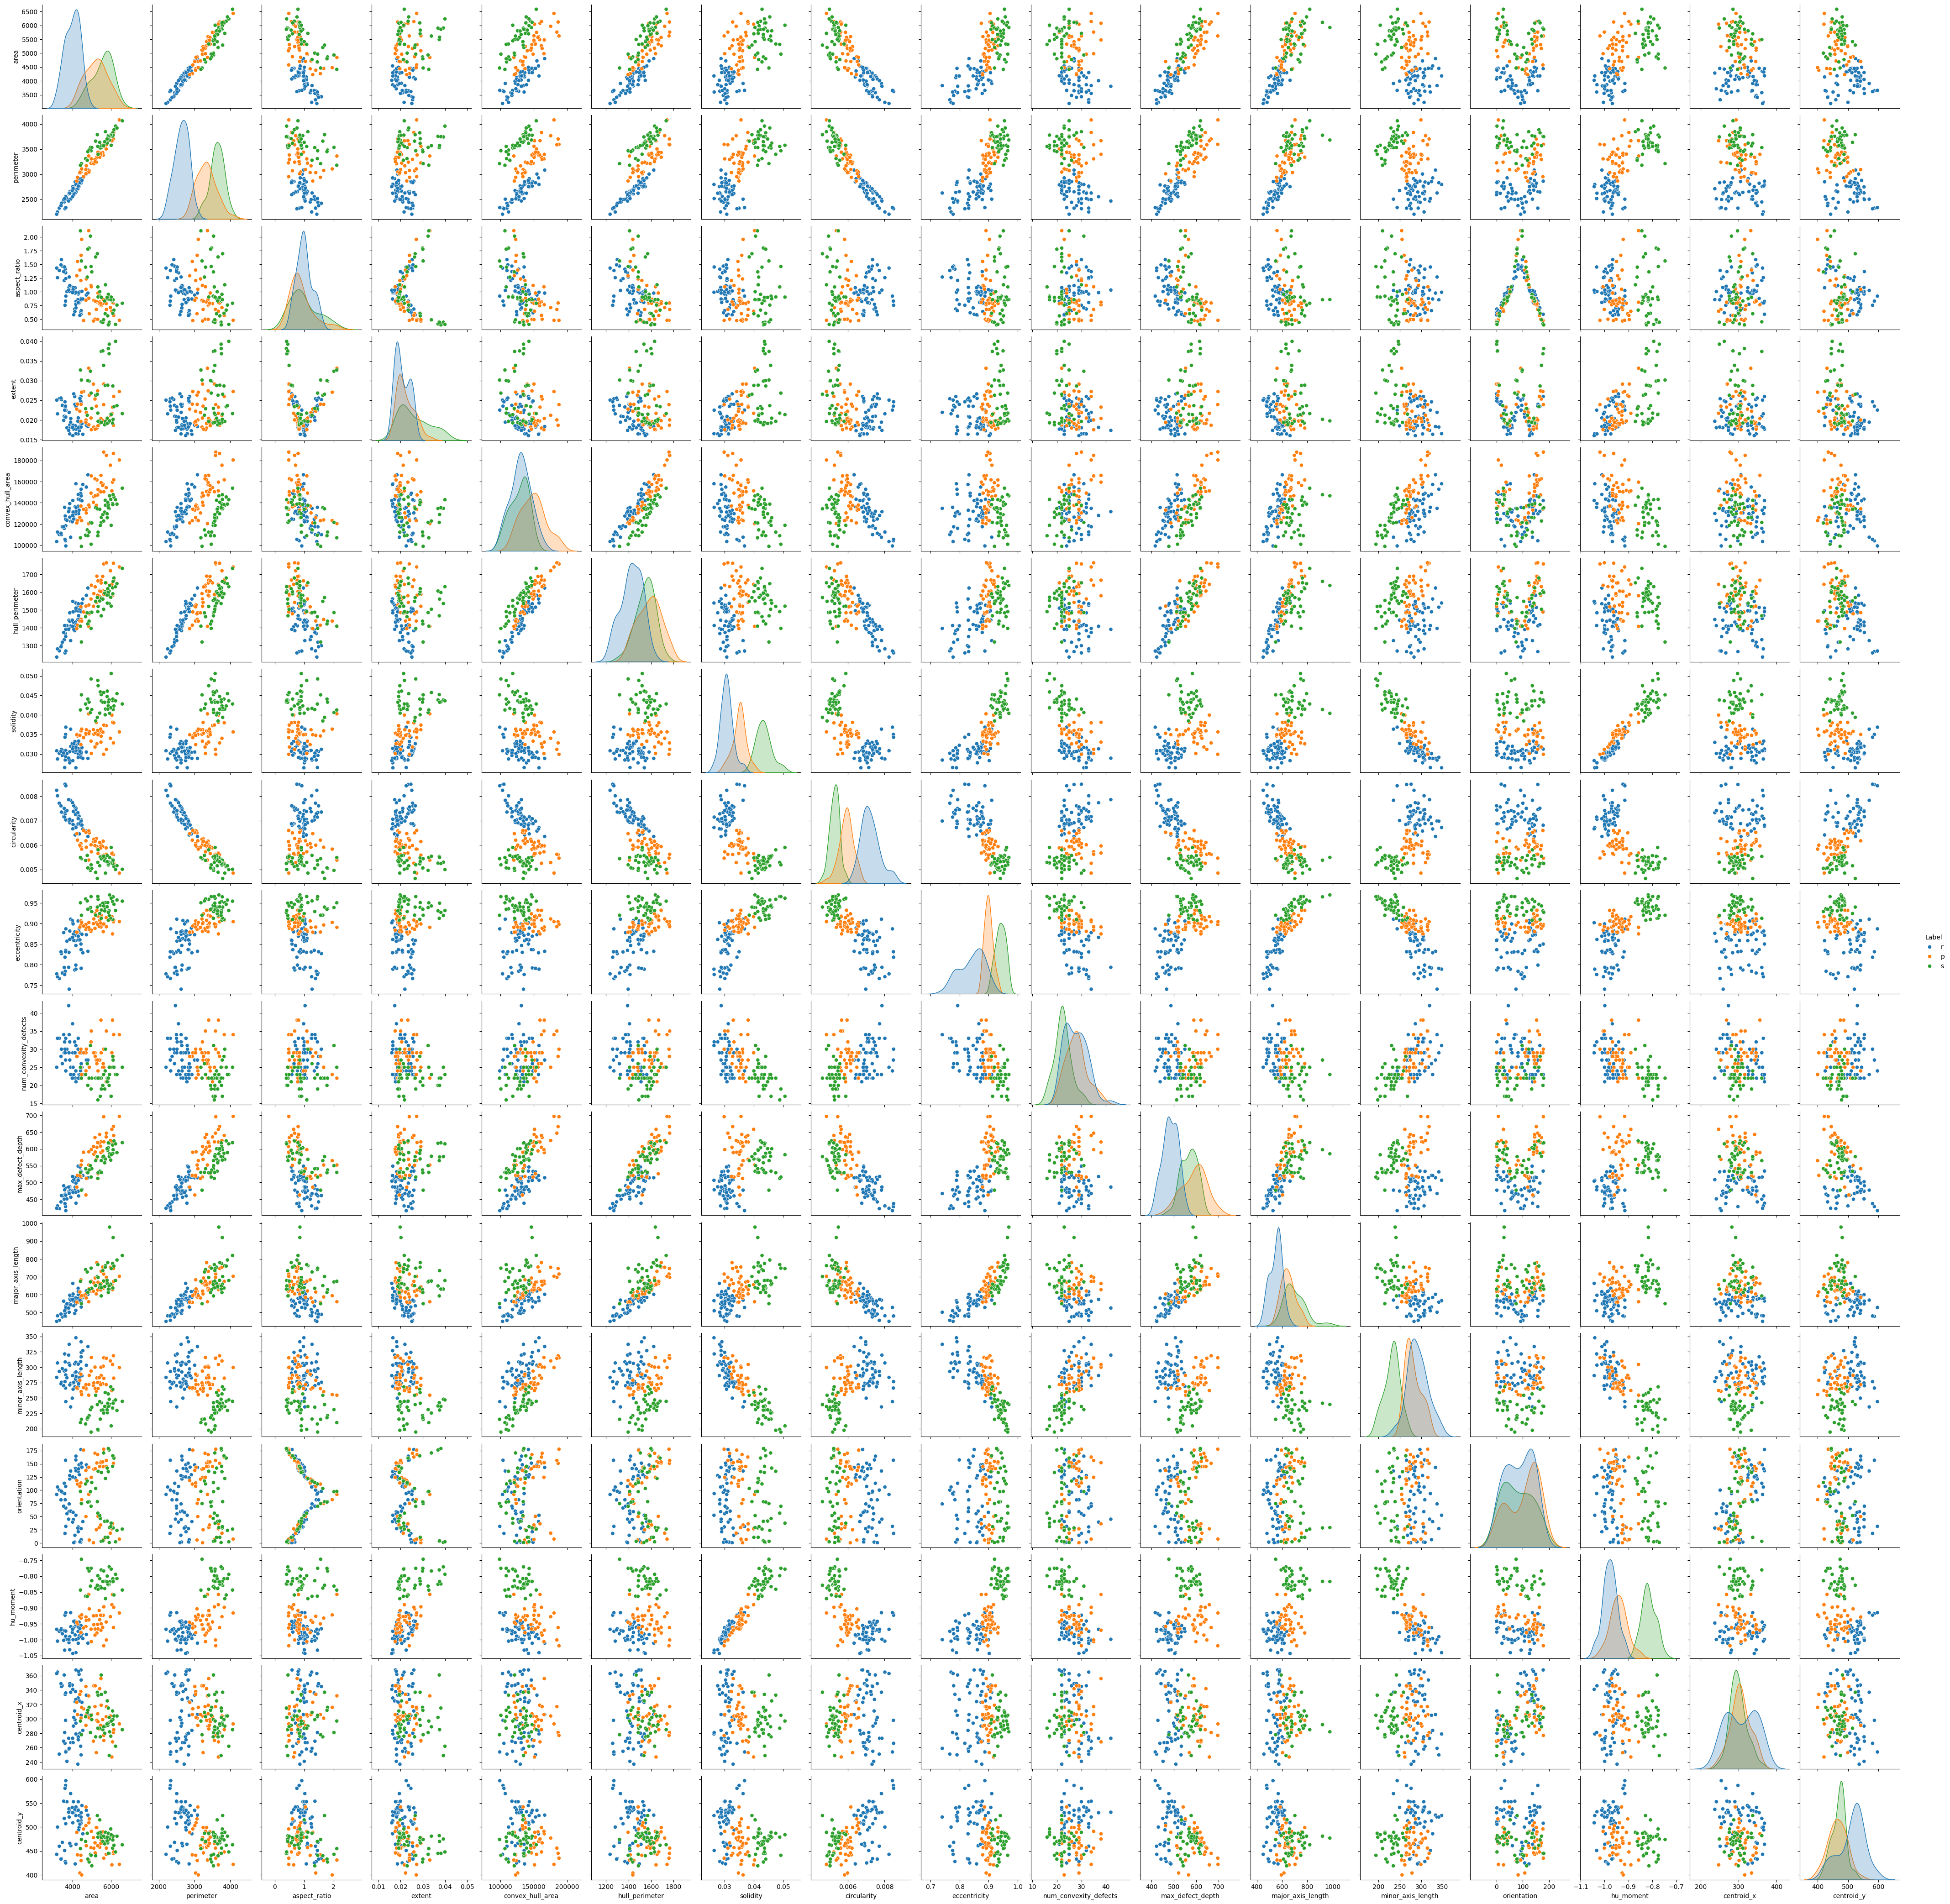

In [144]:
# Scatterplots
# Create one big pairplot with all the features paired against each other
sns.pairplot(df, hue=LABEL)
plt.show()
        

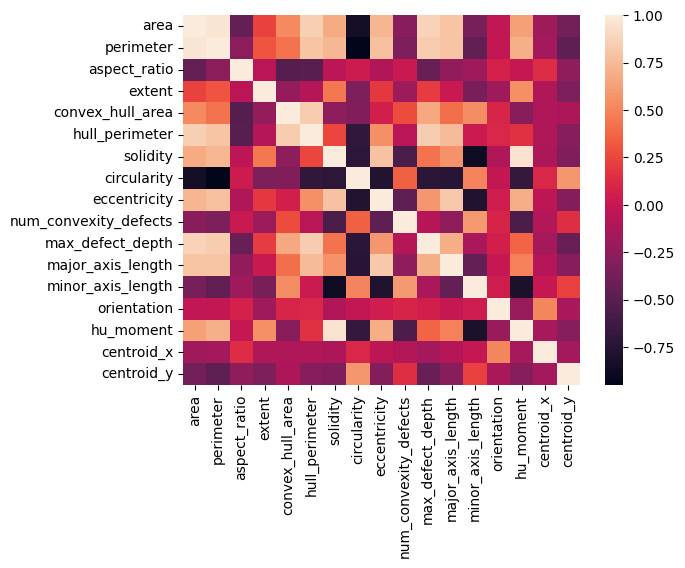

In [145]:
# Heat scatterplots
sns.heatmap(df_corr,annot=False)
plt.show()

area, perimeter, solidity, circularity, eccentricity, hu_moment, major_axis_length en minor_axis_length lijken interessante features om mee te nemen aan de hand van de boxplot. Verder onderzoeken of ze onderling sterke positieve correlaties hebben want er zijn er wel een paar zo op het oog, dit kan potentieel betekenen dat sommige al bestaan in andere door sterke positieve correlaties.

In [146]:
# Define selected features
features = ['area', 'perimeter', 'solidity', 'circularity', 'eccentricity', 'hu_moment', 'major_axis_length', 'minor_axis_length', LABEL]

df = df[features]

df

area    perimeter  solidity  circularity  eccentricity  hu_moment  \
0    3577.5  2448.265275  0.030862     0.007500      0.793076  -0.970790   
1    3477.0  2441.027686  0.029623     0.007333      0.779459  -0.981204   
2    3629.5  2503.446950  0.028459     0.007277      0.783744  -0.995852   
3    4158.5  2683.877531  0.031764     0.007255      0.876714  -0.956791   
4    4119.5  2639.044929  0.031583     0.007433      0.786927  -0.941211   
..      ...          ...       ...          ...           ...        ...   
128  5797.0  3701.501106  0.044713     0.005317      0.940789  -0.817731   
129  6582.5  4063.753858  0.042801     0.005009      0.954500  -0.843564   
130  5617.0  3569.336341  0.045727     0.005540      0.942873  -0.783685   
131  4864.0  3480.650050  0.043267     0.005045      0.935883  -0.783725   
132  4798.0  3449.620611  0.044054     0.005067      0.934622  -0.775177   

     major_axis_length  minor_axis_length Label  
0           482.628448         293.980042     r  
1           475.232941         297.711426     r  
2           496.927307         308.633484     r  
3           583.424377         280.634277     r  
4           494.924316         305.391418     r  
..                 ...                ...   ...  
128         679.984985         230.510330     s  
129         819.460632         244.371765     s  
130         676.558594         225.396713     s  
131         627.471985         221.064896     s  
132         612.230957         217.735138     s  

[133 rows x 9 columns]

In [147]:
# Correlation matrix
# Calculate the correlation coefficient
df_corr = df.drop(LABEL, axis=1).corr()
df_corr

area  perimeter  solidity  circularity  eccentricity  \
area               1.000000   0.968141  0.679665    -0.850136      0.729010   
perimeter          0.968141   1.000000  0.737689    -0.950370      0.777391   
solidity           0.679665   0.737689  1.000000    -0.714570      0.789470   
circularity       -0.850136  -0.950370 -0.714570     1.000000     -0.771582   
eccentricity       0.729010   0.777391  0.789470    -0.771582      1.000000   
hu_moment          0.623250   0.695848  0.950554    -0.679478      0.688420   
major_axis_length  0.795771   0.797672  0.565418    -0.742256      0.822200   
minor_axis_length -0.359554  -0.456145 -0.874886     0.501981     -0.780938   

                   hu_moment  major_axis_length  minor_axis_length  
area                0.623250           0.795771          -0.359554  
perimeter           0.695848           0.797672          -0.456145  
solidity            0.950554           0.565418          -0.874886  
circularity        -0.679478          -0.742256           0.501981  
eccentricity        0.688420           0.822200          -0.780938  
hu_moment           1.000000           0.483681          -0.806550  
major_axis_length   0.483681           1.000000          -0.440899  
minor_axis_length  -0.806550          -0.440899           1.000000

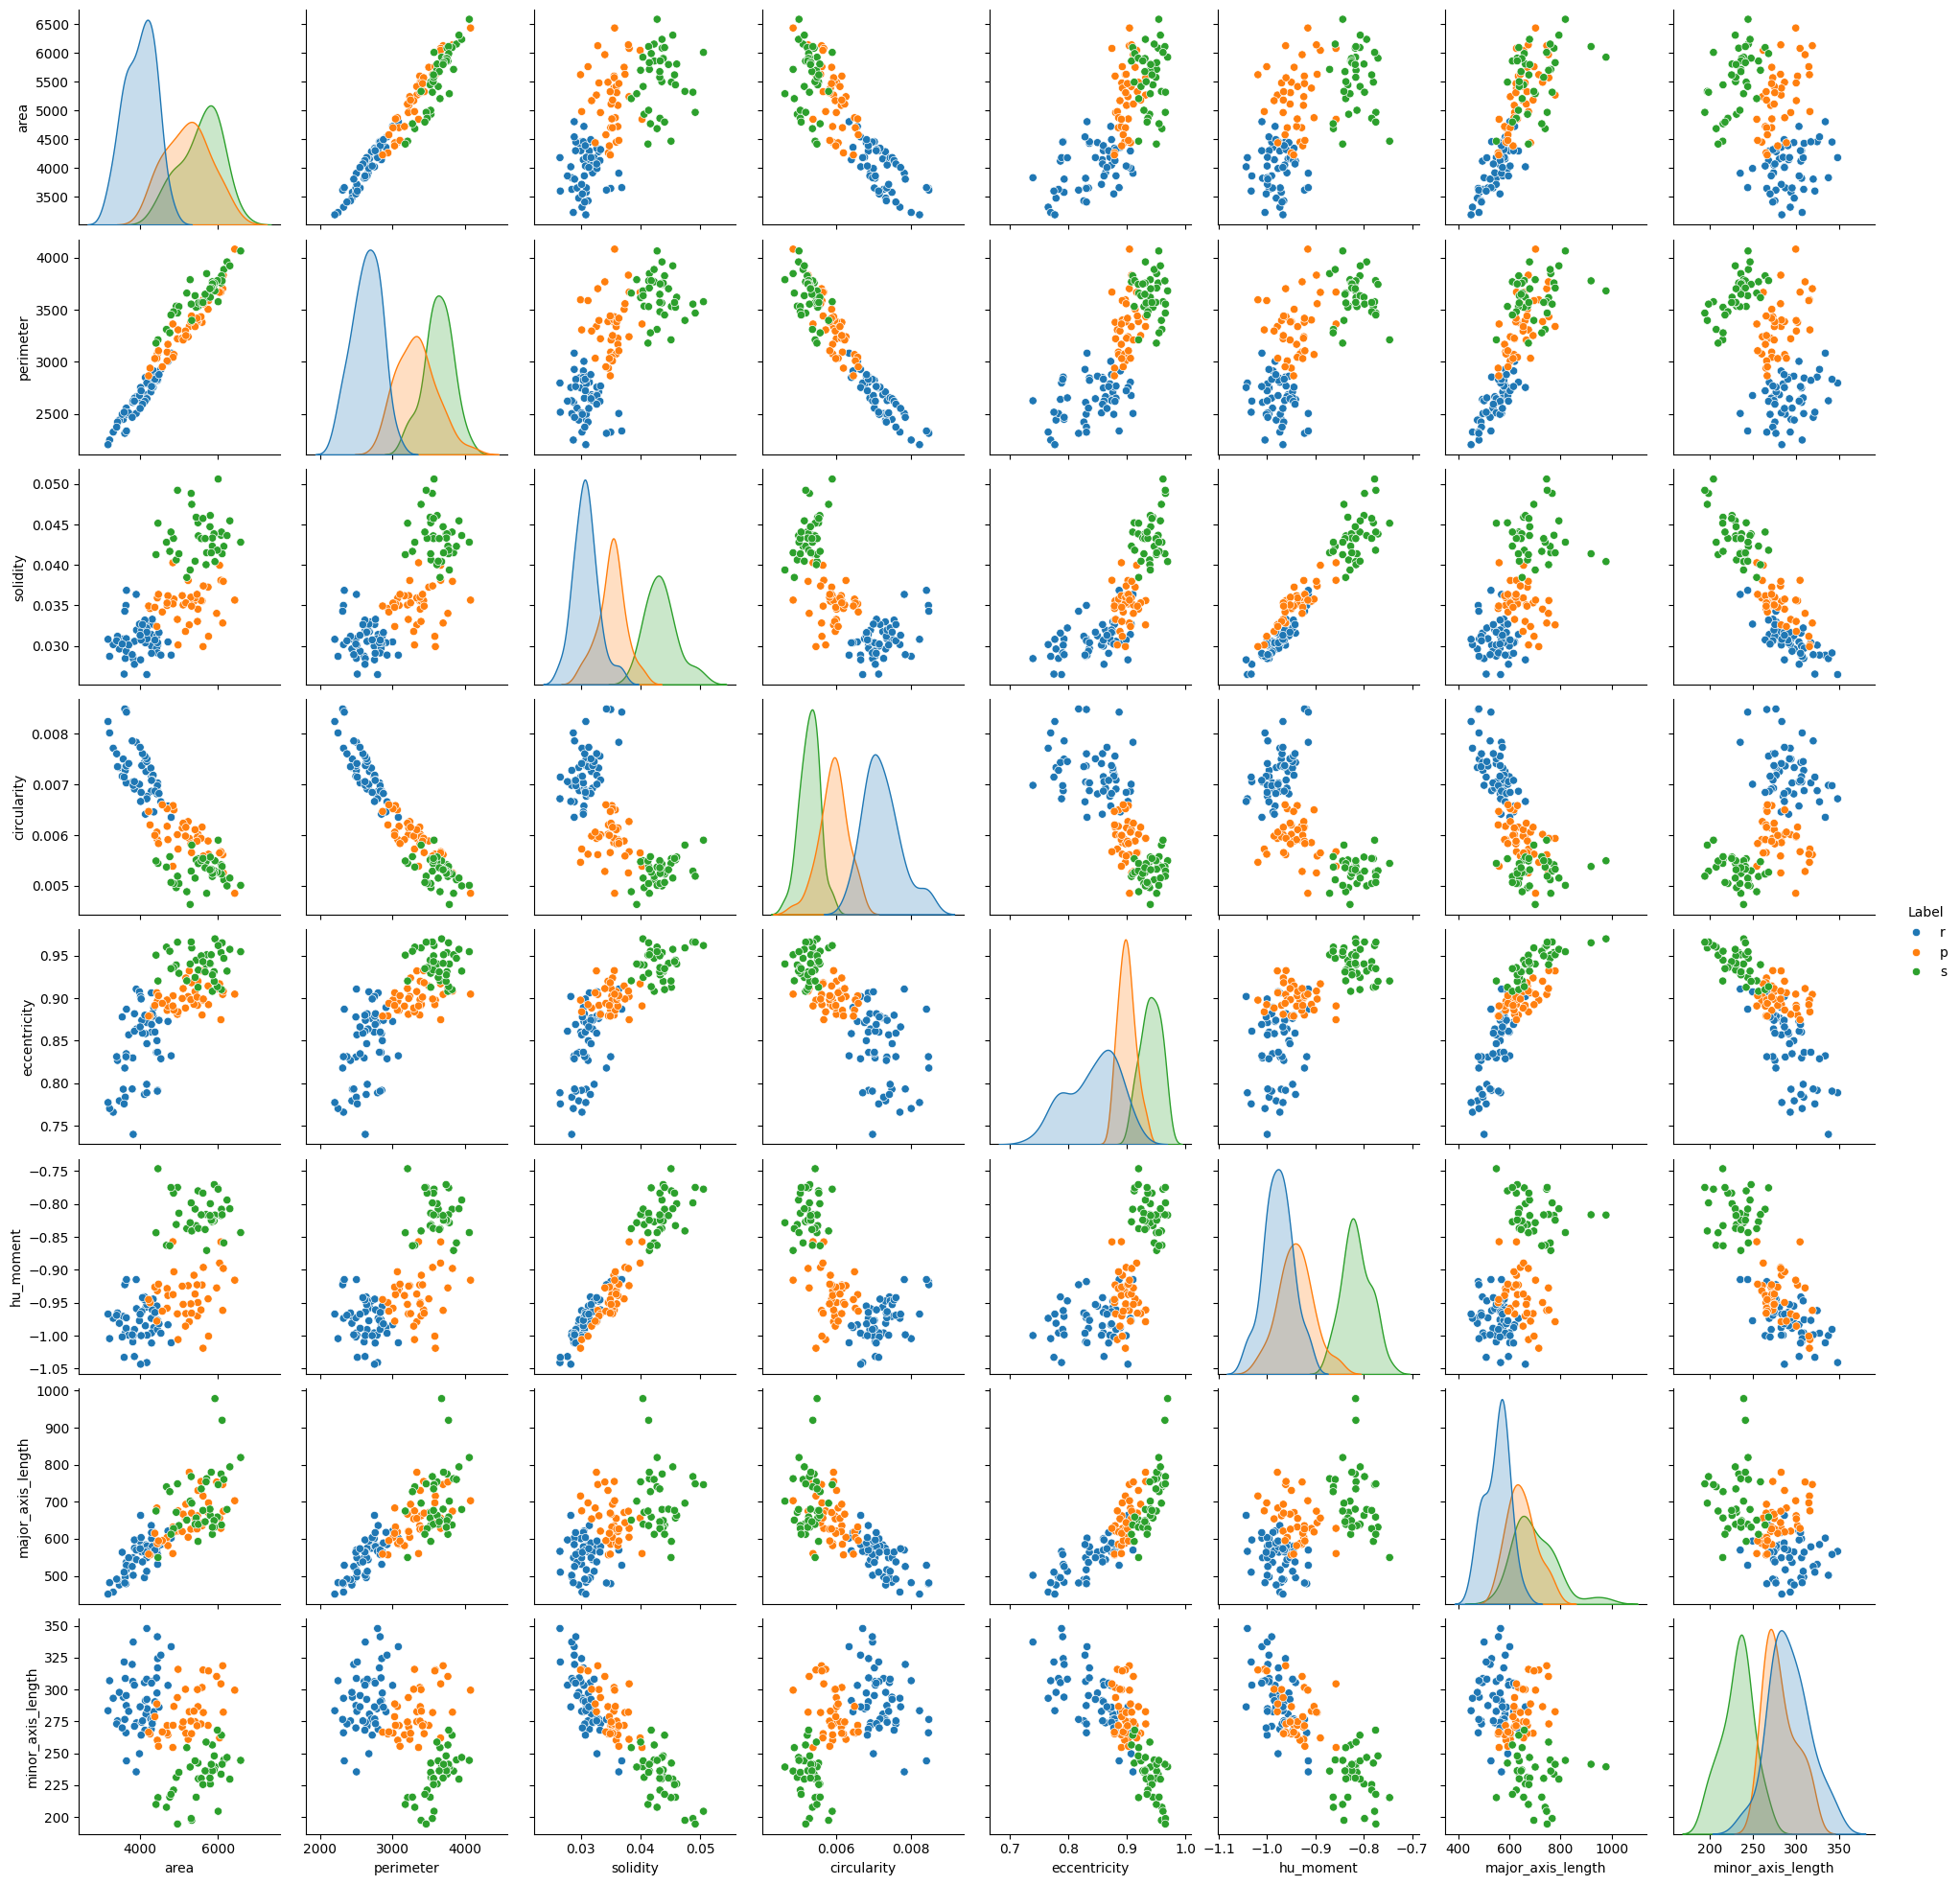

In [148]:
# Pair plot with just the interesting features
sns.pairplot(df, hue=LABEL)
plt.show()

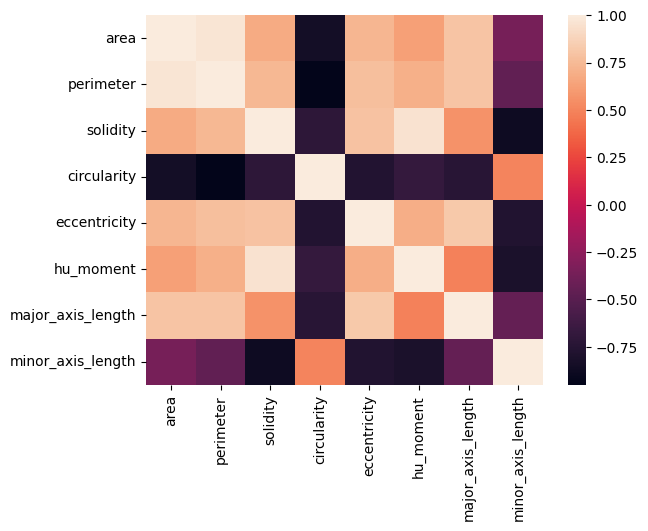

In [149]:
# Heat scatterplots
sns.heatmap(df_corr,annot=False)
plt.show()

In [150]:
# Export features to hand_gesture_features.csv